## Models

### import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as ex
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

### upload dataset

In [2]:
star_data = pd.read_csv('star_classification.csv')

### Pre-processing

In [3]:
star_data = star_data.drop(['obj_ID','alpha','delta','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1)

""" To display percentages of classes """
fig = ex.pie(star_data,names='class',title='Percentages of Different Classes',hole=0.33)

le = LabelEncoder()
star_data["class"] = le.fit_transform(star_data["class"])
star_data["class"] = star_data["class"].astype(int)

x = star_data.drop(['class'], axis=1)
y = star_data.loc[:, 'class'].values

sm = SMOTE(random_state=42)
x, y = sm.fit_resample(x, y)

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [4]:
"""
Split the dataset
"""
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
"""
80% training & 20% test

"""

'\n80% training & 20% test\n\n## Classification Methods\n\n### kNN\n'

## Classification Methods

### KNN

In [5]:
knn1 = KNeighborsClassifier(algorithm='auto', n_neighbors=9)
knn1.fit(x_train, y_train)
y_pred1 = knn1.predict(x_test)
score = knn1.score(x_test, y_test)
knn1_score_ = np.mean(score)

In [7]:
# Display accuracy separate from classification report
print('Accuracy of knn: %.3f' % knn1_score_)
# Display classification report including precision, recall, f1-score
print(classification_report(y_test, y_pred1))

Accuracy of knn: 0.966
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     11806
           1       0.98      0.96      0.97     11865
           2       0.97      0.99      0.98     11996

    accuracy                           0.97     35667
   macro avg       0.97      0.97      0.97     35667
weighted avg       0.97      0.97      0.97     35667



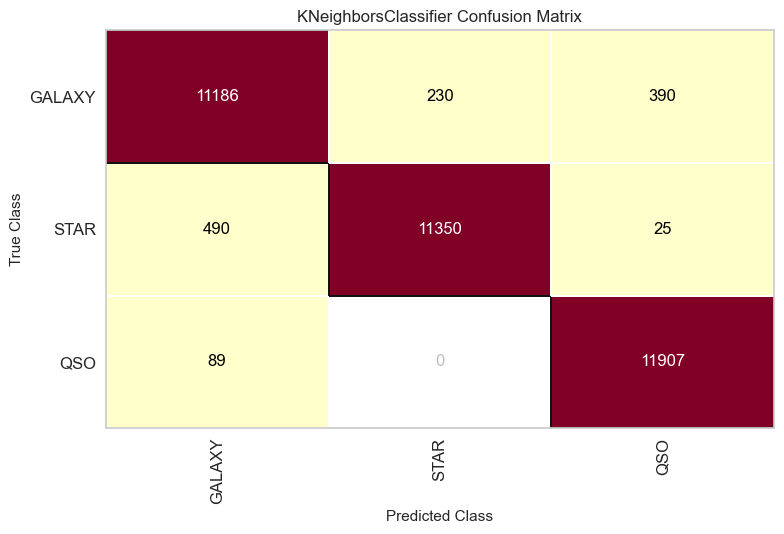

<AxesSubplot: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [8]:
#Display confusion matrix
knn_cm = ConfusionMatrix(knn1, classes=['GALAXY', 'STAR', 'QSO'])
knn_cm.fit(x_train, y_train)
knn_cm.score(x_test, y_test)
knn_cm.show()

### Weighted kNN

In [6]:
knn2 = KNeighborsClassifier(algorithm='auto', n_neighbors=9, weights='distance')
knn2.fit(x_train, y_train)
y_pred2 = knn2.predict(x_test)
score = knn2.score(x_test, y_test)
knn2_score_ = np.mean(score)

In [7]:
# Display accuracy separate from classification report
print('Accuracy of weighted knn: %.3f' % knn2_score_)

Accuracy of weighted knn: 0.968


In [12]:
# Display classification report including precision, recall, f1-score
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     11806
           1       0.98      0.96      0.97     11865
           2       0.97      0.99      0.98     11996

    accuracy                           0.97     35667
   macro avg       0.97      0.97      0.97     35667
weighted avg       0.97      0.97      0.97     35667



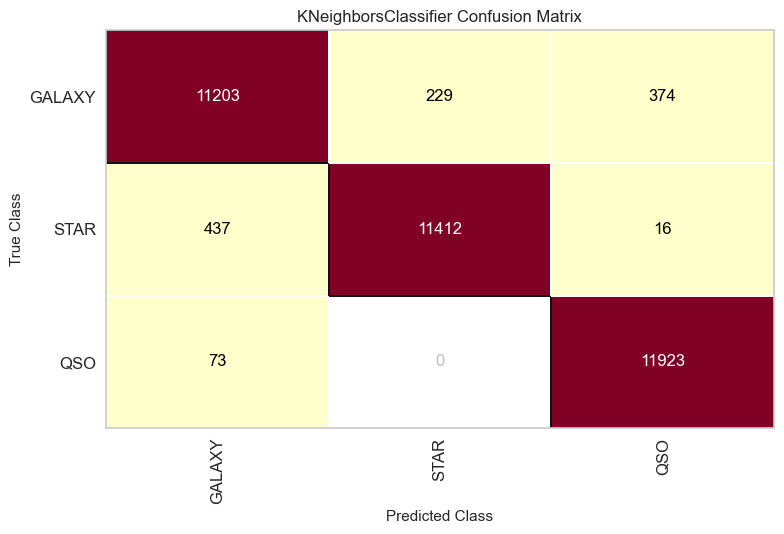

<AxesSubplot: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [13]:
# Display confusion matrix
knn_cm2 = ConfusionMatrix(knn2, classes=['GALAXY', 'STAR', 'QSO'])
knn_cm2.fit(x_train, y_train)
knn_cm2.score(x_test, y_test)
knn_cm2.show()

### Naive Bayes

In [8]:
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred3 = nb.predict(x_test)
score = nb.score(x_test, y_test)
nb_score_ = np.mean(score)

In [9]:
# Display accuracy separate from classification report
print('Accuracy of Naive Bayes: %.3f' % nb_score_)

Accuracy of Naive Bayes: 0.687


In [17]:
# Display classification report including precision, recall, f1-score
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.60      0.83      0.69     11806
           1       0.71      0.91      0.80     11865
           2       1.00      0.32      0.49     11996

    accuracy                           0.69     35667
   macro avg       0.77      0.69      0.66     35667
weighted avg       0.77      0.69      0.66     35667



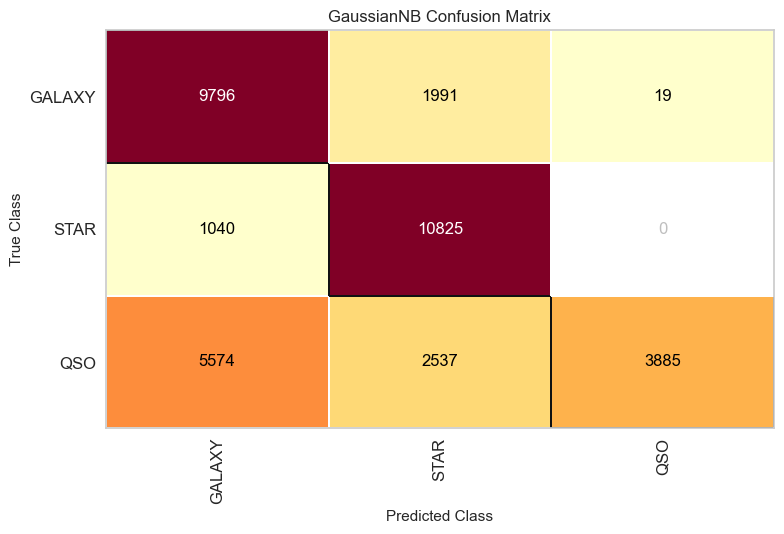

<AxesSubplot: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [18]:
# Display confusion matrix
nb_cm = ConfusionMatrix(nb, classes=['GALAXY', 'STAR', 'QSO'])
nb_cm.fit(x_train, y_train)
nb_cm.score(x_test, y_test)
nb_cm.show()


### Support Vector Machine

In [10]:
svm = svm.SVC(kernel='linear', probability=True, class_weight='balanced')
svm.fit(x_train, y_train)
y_pred4 = svm.predict(x_test)
score = svm.score(x_test, y_test)
svm_score_ = np.mean(score)

In [21]:
# Display accuracy separate from classification report
print('Accuracy of Support Vector Machine: %.3f' % svm_score_)

Accuracy of Support Vector Machine: 0.965


In [22]:
# Display classification report including precision, recall, f1-score
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11806
           1       0.97      0.94      0.95     11865
           2       0.99      1.00      0.99     11996

    accuracy                           0.96     35667
   macro avg       0.96      0.96      0.96     35667
weighted avg       0.96      0.96      0.96     35667



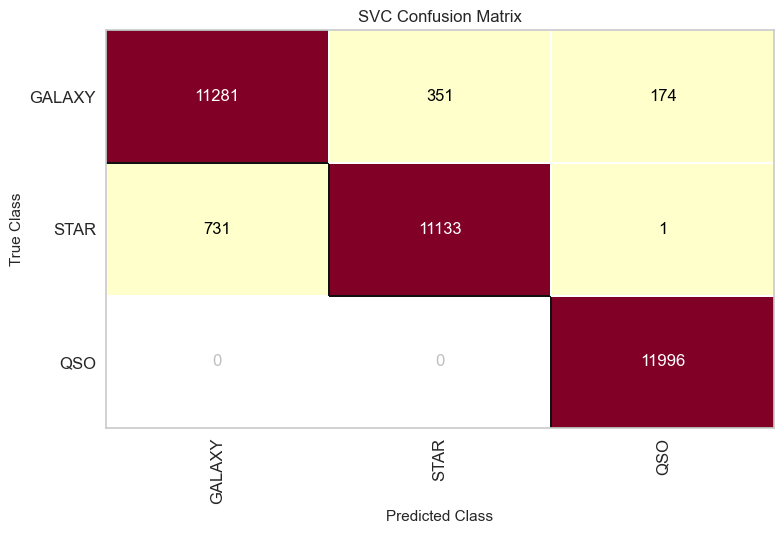

<AxesSubplot: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [23]:
# To show confusion matrix
svm_cm = ConfusionMatrix(svm, classes=['GALAXY', 'STAR', 'QSO'])
svm_cm.fit(x_train, y_train)
svm_cm.score(x_test, y_test)
svm_cm.show()

### Random Forest

In [25]:
r_forest = RandomForestClassifier()
r_forest.fit(x_train, y_train)
y_pred5 = r_forest.predict(x_test)
score = r_forest.score(x_test, y_test)
r_forest_score_ = np.mean(score)

In [26]:
# Display accuracy separate from classification report
print('Accuracy of Random Forest: %.3f' % r_forest_score_)

Accuracy of Random Forest: 0.984


In [27]:
# Display classification report including precision, recall, f1-score
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     11806
           1       0.98      0.97      0.98     11865
           2       1.00      1.00      1.00     11996

    accuracy                           0.98     35667
   macro avg       0.98      0.98      0.98     35667
weighted avg       0.98      0.98      0.98     35667



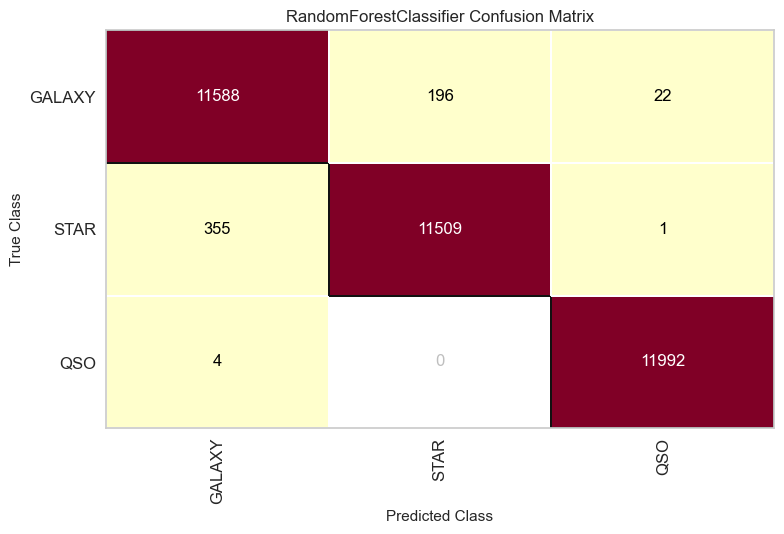

<AxesSubplot: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [28]:
# To show confusion matrix
svm_cm = ConfusionMatrix(r_forest, classes=['GALAXY', 'STAR', 'QSO'])
svm_cm.fit(x_train, y_train)
svm_cm.score(x_test, y_test)
svm_cm.show()